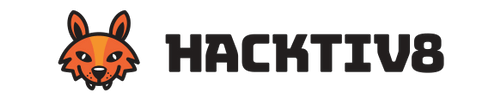

# **Introduction**

The sinking of the Titanic is one of the most infamous shipwrecks in history.

On April 15, 1912, during her maiden voyage, the widely considered “unsinkable” RMS Titanic sank after colliding with an iceberg. Unfortunately, there weren’t enough lifeboats for everyone onboard resulting in the death of 1502 out of 2224 passengers and crew.

While there was some element of luck involved in surviving, it seems some groups of people were more likely to survive than others.

The data consist of 891 row and 11 column. The objective of this project is to predict if a passenger survived the sinking of the Titanic or not. The dataset can be seen in https://www.kaggle.com/c/titanic. 

The dataset contain :

*   survival : Survival
*   pclass : Ticket class
*   sex : Sex
*   age : Age in years	
*   sibsp	: siblings / spouses aboard the Titanic
*   parch : parents / children aboard the Titanic
*   ticket : Ticket number	
*   fare : Passenger fare
*   cabin :	Cabin number
*   embarked : Port of Embarkation






# **Import Library**

In [1]:
pip install jcopml

     |████████████████████████████████| 101 kB 4.4 MB/s 
  Created wheel for jcopml: filename=jcopml-1.1.10-py2.py3-none-any.whl size=33230 sha256=0c35090fd308118faaabca41bbb207a49a6778d76838cf1524f6b2e7f89ef83f
  Stored in directory: /root/.cache/pip/wheels/1e/b0/7a/2e3db99fcf3707a61b80c5193e1155acc8eaf730c510424c6b
Successfully built jcopml


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from jcopml.plot import plot_missing_value
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report
import math

# **Data Loading & EDA**

In [3]:
df = pd.read_csv('/content/titanic.csv')

In [4]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
df.shape

(891, 12)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
# Name & Ticket is not impact to the result, therefore we drop the feature.
df.drop(columns=["Name", "Ticket"], inplace=True)

In [8]:
#handling missing value
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Sex              0
Age            177
SibSp            0
Parch            0
Fare             0
Cabin          687
Embarked         2
dtype: int64

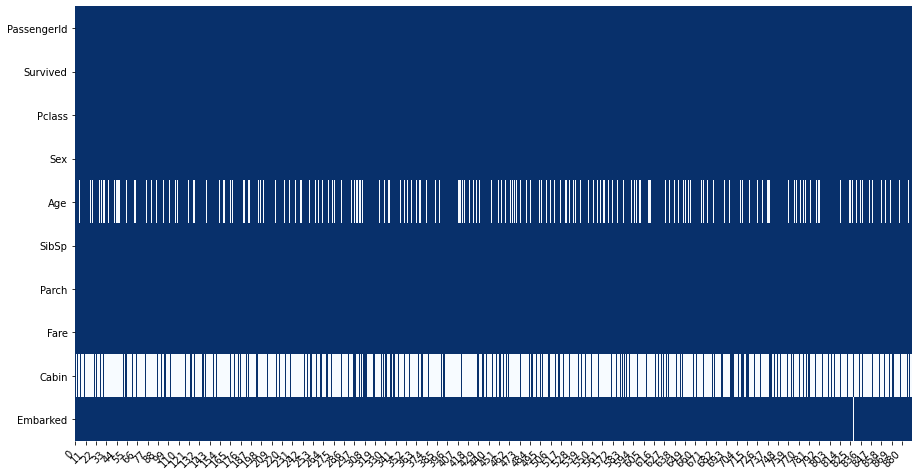

In [9]:
plot_missing_value(df)

Age & cabin column have a lot of missing value therefore i decided to drop the columns. There are 2 missing values in embarked column, i try to fillna with most frequent data.

In [10]:
df.drop(columns=["Age", "Cabin"], inplace=True)

In [11]:
df.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [12]:
df.Embarked.fillna("S", inplace=True)

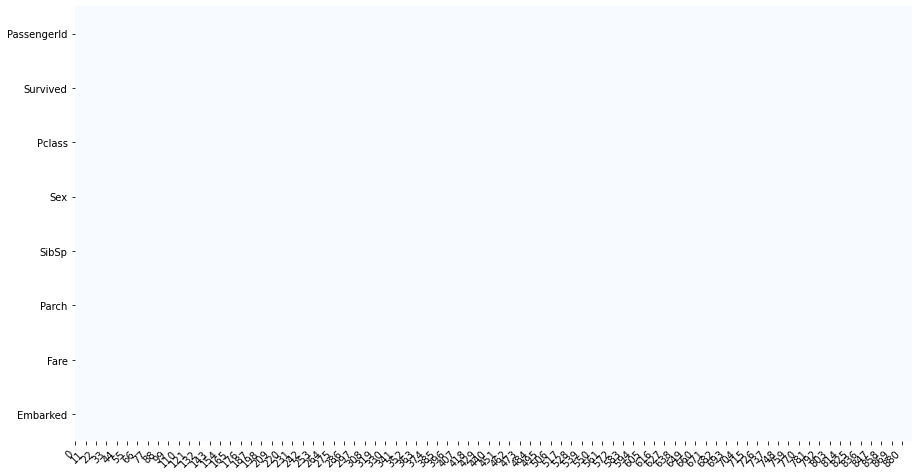

In [13]:
plot_missing_value(df)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    object 
 4   SibSp        891 non-null    int64  
 5   Parch        891 non-null    int64  
 6   Fare         891 non-null    float64
 7   Embarked     891 non-null    object 
dtypes: float64(1), int64(5), object(2)
memory usage: 55.8+ KB


Visualize the data to get better understanding using seaborn

In [15]:
categorical = df.drop(columns=['Fare', 'PassengerId'])

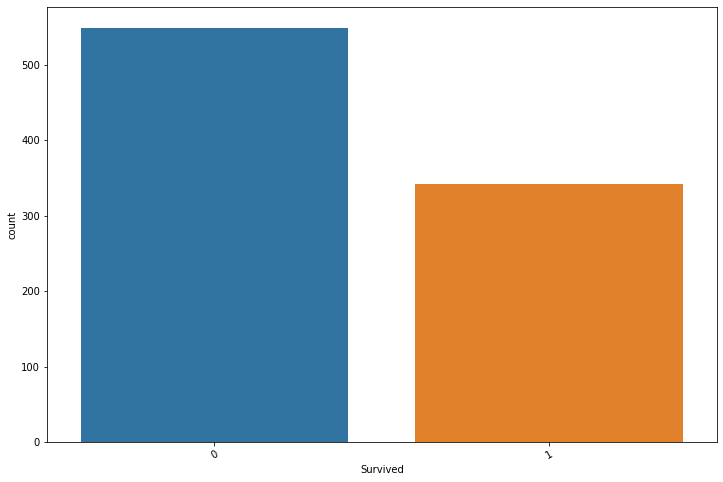

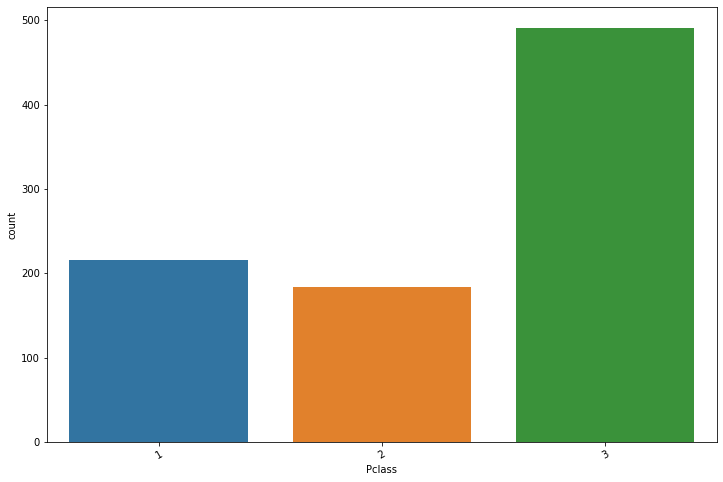

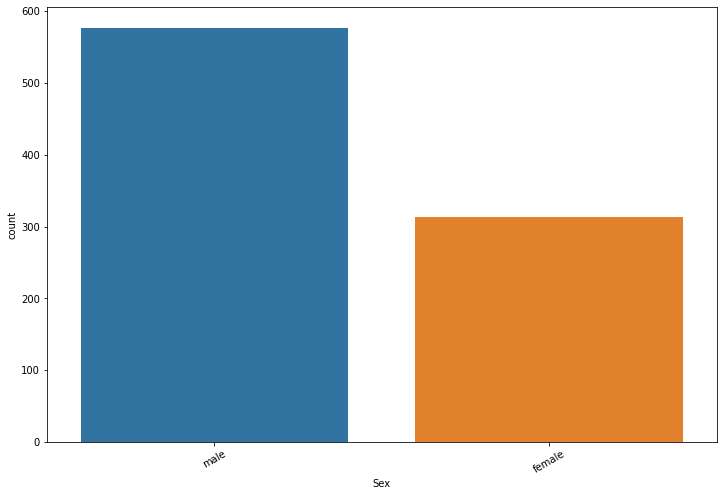

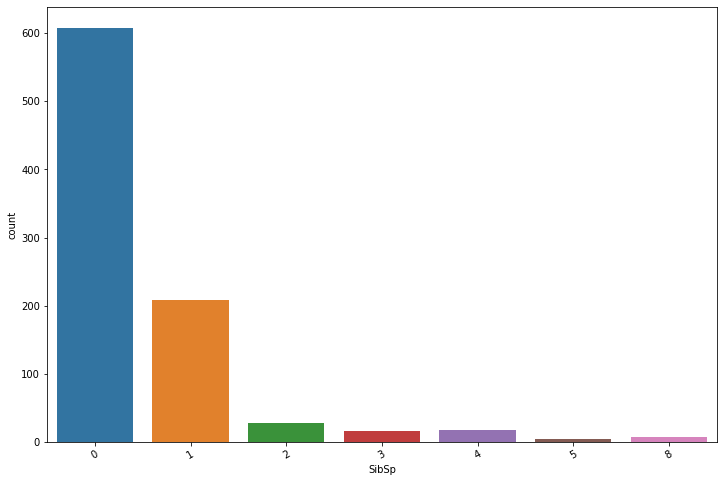

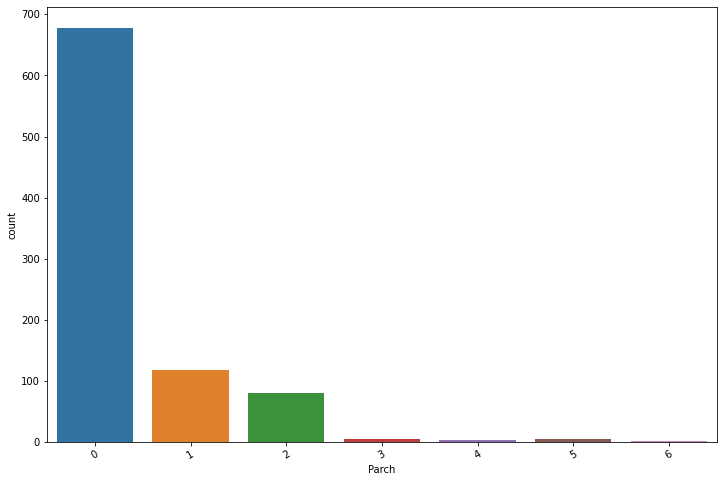

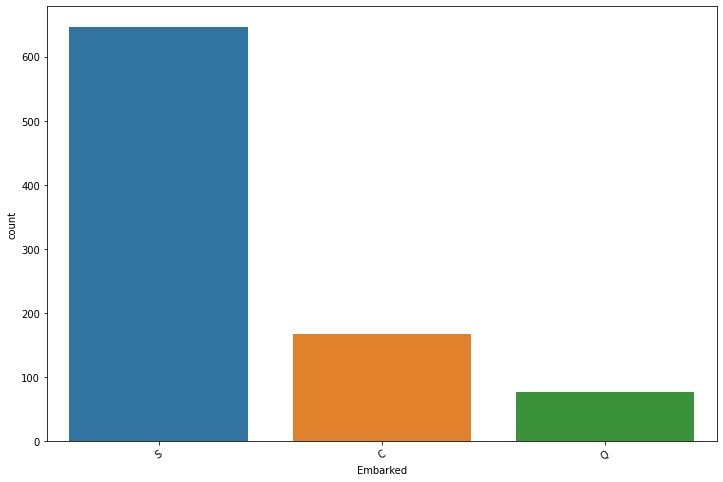

In [16]:
for i in categorical:
    fig, ax = plt.subplots(figsize=(12, 8))
    
    sns.countplot(x = categorical[i], data = df)
    

    plt.xticks(rotation=30)

From the visual above we get insights :

*   Most of the passengers are not survived
*   Most of the passengers from class 3 (lowest class)
*   Most of the passengers are male
*   Most of the passengers are alone
*   Most of the passengers' embarked is S

In [17]:
categoric = categorical.drop(columns="Survived")

In [18]:
categoric

,Pclass,Sex,SibSp,Parch,Embarked
0,3,male,1,0,S
1,1,female,1,0,C
2,3,female,0,0,S
3,1,female,1,0,S
4,3,male,0,0,S
...,...,...,...,...,...
886,2,male,0,0,S
887,1,female,0,0,S
888,3,female,1,2,S
889,1,male,0,0,C


Comparing survived column and each of these categorical variables 

In [19]:
for i in categoric:
  print(i)
  print(df.groupby(["Survived", i])["Fare"].count(), "\n")

Pclass
Survived  Pclass
0         1          80
          2          97
          3         372
1         1         136
          2          87
          3         119
Name: Fare, dtype: int64 

Sex
Survived  Sex   
0         female     81
          male      468
1         female    233
          male      109
Name: Fare, dtype: int64 

SibSp
Survived  SibSp
0         0        398
          1         97
          2         15
          3         12
          4         15
          5          5
          8          7
1         0        210
          1        112
          2         13
          3          4
          4          3
Name: Fare, dtype: int64 

Parch
Survived  Parch
0         0        445
          1         53
          2         40
          3          2
          4          4
          5          4
          6          1
1         0        233
          1         65
          2         40
          3          3
          5          1
Name: Fare, dtype: int64 

Embarked
Su

Insight:

*   First class has higher chance to survived than second & third
*   Female has higher chance to survived than male
*   SibSp 0 has lower chance to survieve than bring sibling/spouse
*   Parch 0 has lower chance to survieve than bring parent/child
*   Embarked C has higher chance to survive than other embarked






# Preproccesing Data

In [20]:
df.set_index("PassengerId", inplace=True)

In [21]:
X = df.drop(columns=["Survived"])
y = df.Survived

In [22]:
X = pd.get_dummies(X, columns=["Pclass", "Sex", "Embarked"])

**Splitting the data**

In [23]:
X_train, X_test, y_train, y_test  = train_test_split(X,y, test_size=0.4, stratify=y, random_state=42)

**Feature Engineer**

Scaling

In [24]:
scaler = MinMaxScaler()
scaler.fit(X_train)

MinMaxScaler(copy=True, feature_range=(0, 1))

In [25]:
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [26]:
scaler = MinMaxScaler()
scaler.fit(X_train)

MinMaxScaler(copy=True, feature_range=(0, 1))

In [27]:
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Defining Model

**K-Nearest Neighbor**

In [28]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train_scaled, y_train)
predict_KNN = knn.predict(X_test_scaled)

accuracy_KNN = accuracy_score(y_test, predict_KNN)
print("Model's accuracy: ", accuracy_KNN, '\n')

Model's accuracy:  0.7675070028011205 



Accuracy model using KNN is 76 %

**Support Vector Machine**

In [29]:
from sklearn import svm

In [30]:
model_SVM = svm.SVC()
model_SVM.fit(X_train_scaled, y_train)
predict_SVM = model_SVM.predict(X_test_scaled)

accuracy_SVM = accuracy_score(y_test, predict_SVM)
print("Model's accuracy: ", accuracy_SVM, '\n')

Model's accuracy:  0.8263305322128851 



Accuracy model using SVM is 82 %

**Decision Tree Classifier (CART)**

In [31]:
from sklearn.tree import DecisionTreeClassifier

In [32]:
DT = DecisionTreeClassifier()
DT.fit(X_train_scaled, y_train)
predict_DT = DT.predict(X_test_scaled)

accuracy_DT = accuracy_score(y_test, predict_DT)
print("Model's accuracy: ", accuracy_DT, '\n')

Model's accuracy:  0.7843137254901961 



Accuracy model using CART is 78 %

**Random Forest**

In [33]:
from sklearn.ensemble import RandomForestClassifier
RF = RandomForestClassifier()
RF.fit(X_train_scaled, y_train)
predict_RF = RF.predict(X_test_scaled)

accuracy_RF = accuracy_score(y_test, predict_RF)
print("Model's accuracy: ", accuracy_RF, '\n')

Model's accuracy:  0.7675070028011205 



Accuracy model using RF is 77 %

**Naive Bayes**

In [34]:
from sklearn.naive_bayes import GaussianNB
NB = GaussianNB()
NB.fit(X_train_scaled, y_train)
predict_NB = NB.predict(X_test_scaled)

accuracy_NB = accuracy_score(y_test, predict_NB)
print("Model's accuracy: ", accuracy_NB, '\n')

Model's accuracy:  0.8123249299719888 



Accuracy model using KNN is 81 %

In [35]:
print('Accuracy of K-Nearest Neighbors: ', accuracy_KNN)
print('Accuracy of Support Vector Machine: ', accuracy_SVM)
print('Accuracy of Decision Tree: ', accuracy_DT)
print('Accuracy of Random Forest: ', accuracy_RF)
print('Accuracy of Naive Bayes: ', accuracy_NB)

Accuracy of K-Nearest Neighbors:  0.7675070028011205
Accuracy of Support Vector Machine:  0.8263305322128851
Accuracy of Decision Tree:  0.7843137254901961
Accuracy of Random Forest:  0.7675070028011205
Accuracy of Naive Bayes:  0.8123249299719888


# Evaluation

I decided to use Support Vecor Machine to predict a passenger survived in the sinking of titanic since it has the highest accuracy model.